In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load and normalization vector of parameters.

In [3]:
# Loading each csv file
allpatients = pd.read_csv('Time_Female.csv')
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,18760.0,-11958.0,5294.547930,0.317484,0.894478,Chory
1,7822.0,-9809.0,3423.929549,-0.643199,-0.277961,Chory
2,8645.0,-12309.0,3791.464376,-0.876762,-0.070322,Chory
3,7948.0,-13705.0,3430.957024,-0.716686,-0.419052,Chory
4,19539.0,-17650.0,4096.550818,0.617535,0.500717,Chory


Features has diffrent rows, so they have to be normalized.

In [4]:
features = allpatients.drop(labels='Status', axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,0.392833,0.650963,-0.147024,0.270322,1.307170,Chory
1,-1.637035,0.990899,-1.229182,-0.782410,-1.406034,Chory
2,-1.484303,0.595441,-1.016562,-1.038352,-0.925525,Chory
3,-1.613652,0.374617,-1.225117,-0.862938,-1.732540,Chory
4,0.537400,-0.249415,-0.840069,0.599122,0.395947,Chory


Afterwards data have to be suffled, in order to avoid overfitting

In [5]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,0.406937,0.561115,-0.462049,0.843653,1.531291,Zdrowy
1,-0.381961,0.934585,-0.374104,-0.751883,0.407130,Chory
2,1.805835,-1.181430,1.755394,-0.158839,0.273673,Zdrowy
3,-0.352640,0.090520,0.861995,-1.183689,-0.940223,Zdrowy
4,-0.434666,1.281165,-0.855766,1.000625,2.484694,Zdrowy


# PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [8]:
from mpl_toolkits.mplot3d import Axes3D

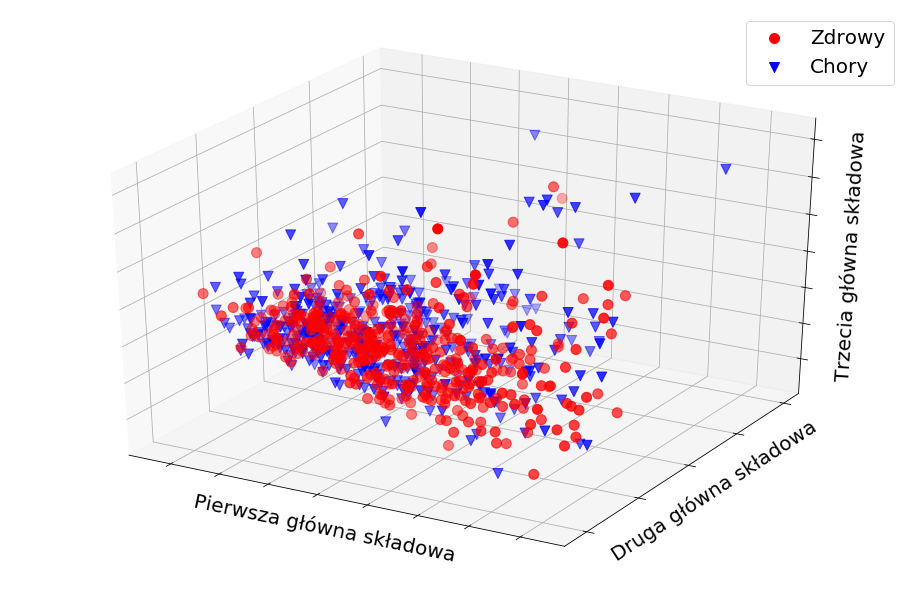

In [9]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga główna składowa', fontsize=20)
ax.set_zlabel('Trzecia główna składowa', fontsize=20)
plt.show()

# Dummy variables

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [10]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [11]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [12]:
allpatients['Chory'] = status
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Chory
0,0.406937,0.561115,-0.462049,0.843653,1.531291,1
1,-0.381961,0.934585,-0.374104,-0.751883,0.407130,0
2,1.805835,-1.181430,1.755394,-0.158839,0.273673,1
3,-0.352640,0.090520,0.861995,-1.183689,-0.940223,1
4,-0.434666,1.281165,-0.855766,1.000625,2.484694,1


# Logistic regression algorithm

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'],axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [15]:
from sklearn.linear_model import LogisticRegression

In [38]:
logModel = LogisticRegression(C = 0.01, solver='liblinear')
logModel.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61        89
           1       0.56      0.48      0.52        83

   micro avg       0.57      0.57      0.57       172
   macro avg       0.57      0.57      0.57       172
weighted avg       0.57      0.57      0.57       172



In [20]:
print(confusion_matrix(y_test,prediction))

[[54 35]
 [45 38]]


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf = RandomForestClassifier(n_estimators=350)

In [47]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
prediction = clf.predict(X_test)

# Evaluation

In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63        89
           1       0.59      0.57      0.58        83

   micro avg       0.60      0.60      0.60       172
   macro avg       0.60      0.60      0.60       172
weighted avg       0.60      0.60      0.60       172



In [26]:
print(confusion_matrix(y_test, prediction))

[[56 33]
 [38 45]]


In [27]:
feature_importance = clf.feature_importances_

[Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'RMS'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

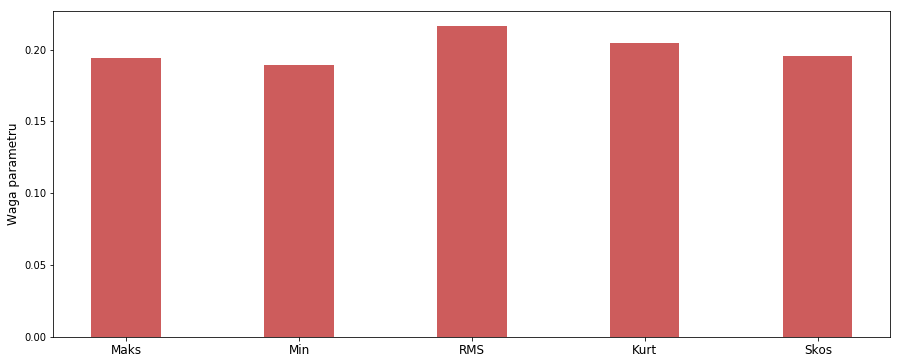

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['Maks', 'Min', 'RMS', 'Kurt', 'Skos'], fontsize=12)

In [29]:
feature_importance

array([0.19400999, 0.18927415, 0.21626756, 0.20474118, 0.19570712])